In [75]:
import numpy as np
import matplotlib.pyplot as plt
# 3 inputs, 4 hidden layers, 1 output

In [76]:
# Input data
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# Desired output
D = np.array([[1], [0], [0], [1]])

In [77]:
# Number of neurons in each layer
input_neurons = X.shape[1]
hidden_neurons = 4
output_neurons = 1

In [78]:
# Random initialization of weights
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(hidden_neurons, input_neurons)
W2 = np.random.randn(output_neurons, hidden_neurons)

In [79]:
alpha = 0.9
mse = []

# Get the size of X
size_of_X = X.shape[0]

In [80]:
for epochs in range(500):
    total_error = 0
    for value in range(size_of_X):
        x = X[value, :].reshape(-1, 1)
        d = D[value]

        # Forward pass
        weighted_sum_input2hidden = np.dot(W1, x)
        sigmoid_input2hidden = 1 / (1 + np.exp(-weighted_sum_input2hidden))

        weighted_sum_hidden2output = np.dot(W2, sigmoid_input2hidden)
        sigmoid_hidden2output = 1 / (1 + np.exp(-weighted_sum_hidden2output))

        # Calculate error
        error = d - sigmoid_hidden2output
        total_error += np.sum(error**2)
        delta_output = sigmoid_hidden2output * (1 - sigmoid_hidden2output) * error

        # Backpropagation
        error_at_hidden = np.dot(W2.T, delta_output)
        delta_hidden = sigmoid_input2hidden * (1 - sigmoid_input2hidden) * error_at_hidden

        # Weight updates
        dW1 = alpha * np.dot(delta_hidden, x.T)
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta_output, sigmoid_input2hidden.T)
        W2 = W2 + dW2

    mse.append(total_error / size_of_X)
mse = np.array(mse).flatten()

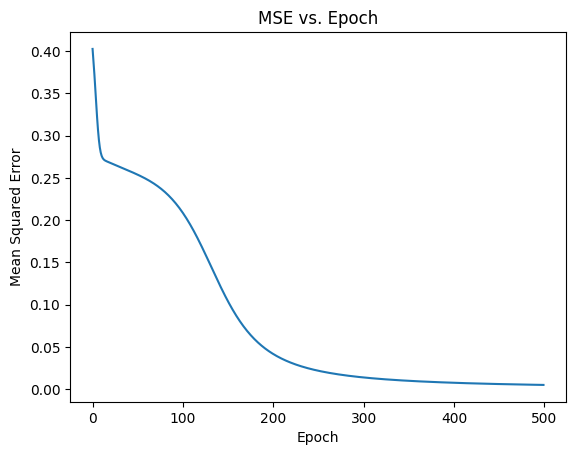

In [81]:
# Plot the mean squared error
plt.plot(range(500), mse)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Epoch')
plt.show()